#### 动手实现线性回归

In [44]:
%matplotlib inline

In [45]:
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [46]:
# 生成数据集
# Y = WX + b

In [47]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [48]:
features.shape, labels.shape

((1000, 2), (1000,))

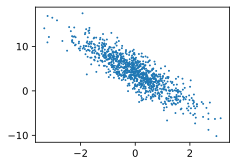

In [49]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);  # 加分号只显示图

In [51]:
# 随机读取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素

In [52]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-0.16825117  0.1553077 ]
 [ 0.48473534  1.5287341 ]
 [ 0.9574361   1.1849451 ]
 [-1.6120443   0.629541  ]
 [ 2.4402065  -0.05688141]
 [-1.3746845   0.06956498]
 [ 0.25383762 -0.03598363]
 [ 0.34734687  1.2208083 ]
 [-0.10916359 -1.0727377 ]
 [-0.5684469  -0.1756882 ]]
<NDArray 10x2 @cpu(0)> 
[ 3.3388424  -0.03102794  2.0907574  -1.1694877   9.264436    1.2157123
  4.833865    0.7411063   7.6221566   3.6555672 ]
<NDArray 10 @cpu(0)>


In [53]:
# 权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化成0。
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [54]:
w.attach_grad()
b.attach_grad()

In [55]:
#定义线性回归
def linreg(X, w, b):
    return nd.dot(X, w) + b 

In [56]:
#定义损失函数 均方差损失函数
def square_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [57]:
#优化算法
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh包中方便以后使用
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [62]:
# 模型训练
lr = 0.001
num_epochs = 100
net = linreg
loss = square_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_itr(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.000052
epoch 2, loss 0.000052
epoch 3, loss 0.000052
epoch 4, loss 0.000052
epoch 5, loss 0.000052
epoch 6, loss 0.000052
epoch 7, loss 0.000052
epoch 8, loss 0.000052
epoch 9, loss 0.000052
epoch 10, loss 0.000052
epoch 11, loss 0.000052
epoch 12, loss 0.000052
epoch 13, loss 0.000052
epoch 14, loss 0.000052
epoch 15, loss 0.000052
epoch 16, loss 0.000052
epoch 17, loss 0.000052
epoch 18, loss 0.000052
epoch 19, loss 0.000052
epoch 20, loss 0.000052
epoch 21, loss 0.000052
epoch 22, loss 0.000052
epoch 23, loss 0.000052
epoch 24, loss 0.000052
epoch 25, loss 0.000052
epoch 26, loss 0.000052
epoch 27, loss 0.000052
epoch 28, loss 0.000052
epoch 29, loss 0.000052
epoch 30, loss 0.000052
epoch 31, loss 0.000052
epoch 32, loss 0.000052
epoch 33, loss 0.000052
epoch 34, loss 0.000052
epoch 35, loss 0.000052
epoch 36, loss 0.000052
epoch 37, loss 0.000052
epoch 38, loss 0.000052
epoch 39, loss 0.000052
epoch 40, loss 0.000052
epoch 41, loss 0.000052
epoch 42, loss 0.000052
e

In [63]:
true_w, w

([2, -3.4], 
 [[ 2.0001748]
  [-3.3998284]]
 <NDArray 2x1 @cpu(0)>)

In [64]:
true_b, b

(4.2, 
 [4.2001405]
 <NDArray 1 @cpu(0)>)